In [1]:
# from urllib.request import urlretrieve

# def load_data(download=True):
#     if download:
#         data_path, _ = urlretrieve(
#             "http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data",
#             "./adult.csv"
#         )
#         print("adult dataset download")


# load_data()

downloaded


<!-- https://blog.51cto.com/u_15521344/5061694 -->

1. 连续性数值特征，如age,最好处理
2. 二分类文本信息，二分法处理
3. 多类别文本信息

- age:连续性数值变量；可能的处理方法：分年龄段；
- workcass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov,State-gov, Without-pay, Never-worked.
 ：雇主类型，多类别，一般处理方法：化为数值类别，比如以上八个可以分别表示为1-8（仅为示例，本文并不推荐）；
- fnlwgt: 连续性数值变量；人口普查员认为观察值的人数。该变量在本文不被使用，笔者认为该特征并不重要。
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm,Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th,Preschool.受教育程度，多类别数据，处理方法同workcass；
- education-num: 连续性数值变量，受教育水平年限，一般来讲，该值越大，工资越高；
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated,Widowed, Married-spouse-absent, Married-AF-spouse.婚姻状况，多类别数据；
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial,Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical,Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv,Armed-Forces.职业，多类别数据；
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative,Unmarried.群体性关系，多类别数据；
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.种族，多类别数据，虽然美国反对种族歧视，但是实际上这个在区分美国工资的时候蛮重要；
- sex: Female, Male.性别，最简单的二分法（0&1）；
- capital-gain: 资本收益，连续数值；
- capital-loss: 资本损失，连续数值；
- hours-per-week: 工作时间，连续数值；
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada,Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China,Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico,Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti,Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia,El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.国籍，多类别数据；
- result：结果：“>50K”或“<=50K”，二分类数据，也是本文机器学习的目的（0&1）；

In [4]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [5]:
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship',  'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

# assign column names
df = pd.read_csv("adult.csv", header=None, names=col_names)
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
df.apply(lambda x: np.sum(x == " ?"))

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [7]:
df.replace(" ?", pd.NaT, inplace=True)

In [9]:
df.replace(" >50K", 1, inplace = True)
df.replace(" <=50K", 0, inplace = True)
trans = {'workclass' : df['workclass'].mode()[0], 'occupation' : df['occupation'].mode()[0], 'native-country' : df['native-country'].mode()[0]}
df.fillna(trans, inplace = True)

In [10]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456,0.240810
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429,0.427581
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [11]:
df.drop("fnlwgt", axis=1, inplace=True)
df.drop("capital-gain", axis=1, inplace=True)
df.drop("capital-loss", axis=1, inplace=True)
df.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,0


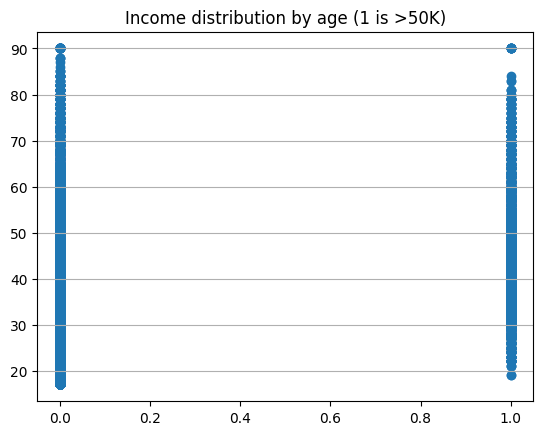

In [11]:
plt.scatter(df["income"], df["age"])
plt.grid(True, which="major", axis="y")
plt.title("Income distribution by age (1 is >50K)")
plt.show()

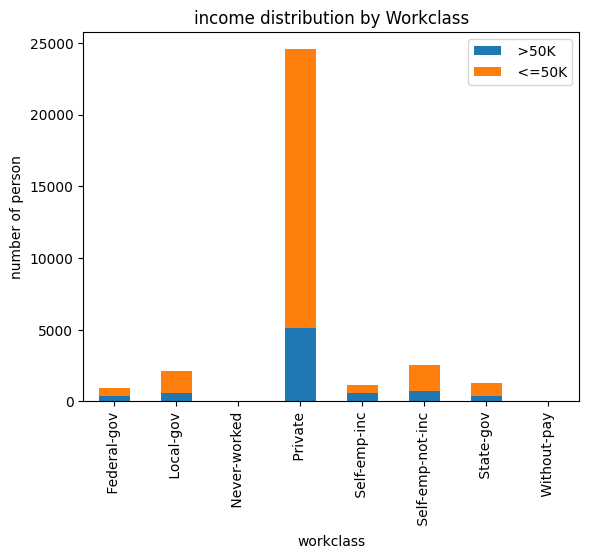

In [12]:
df["workclass"].value_counts()

income_0 = df["workclass"][df["income"] == 0].value_counts()
income_1 = df["workclass"][df["income"] == 1].value_counts()
df1 = pd.DataFrame({" >50K" : income_1, " <=50K" : income_0})
df1.plot(kind = 'bar', stacked = True)


plt.title("income distribution by Workclass")
plt.xlabel("workclass")
plt.ylabel("number of person")
plt.show()

In [13]:
df1 = df["hours-per-week"].groupby(df["workclass"]).agg(["mean", "max", "min"])
df1.sort_values(by="mean", ascending=False)
df1

,mean,max,min
workclass,,,
Federal-gov,41.379167,99,4
Local-gov,40.982800,99,2
Never-worked,28.428571,40,4
Private,39.642345,99,1
Self-emp-inc,48.818100,99,1
Self-emp-not-inc,44.421881,99,1
State-gov,39.031587,99,1
Without-pay,32.714286,65,10


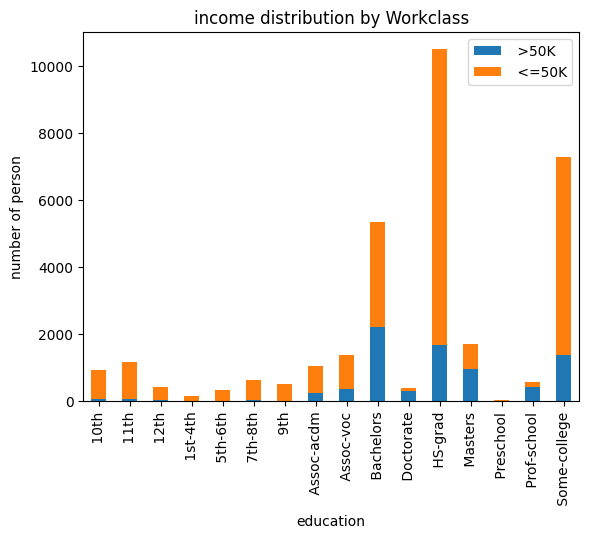

In [14]:
income_0 = df["education"][df["income"] == 0].value_counts()
income_1 = df["education"][df["income"] == 1].value_counts()
df1 = pd.DataFrame({" >50K" : income_1, " <=50K" : income_0})
df1.plot(kind = 'bar', stacked = True)


plt.title("income distribution by Workclass")
plt.xlabel("education")
plt.ylabel("number of person")
plt.show()

Text(0.5, 0, 'education-num')

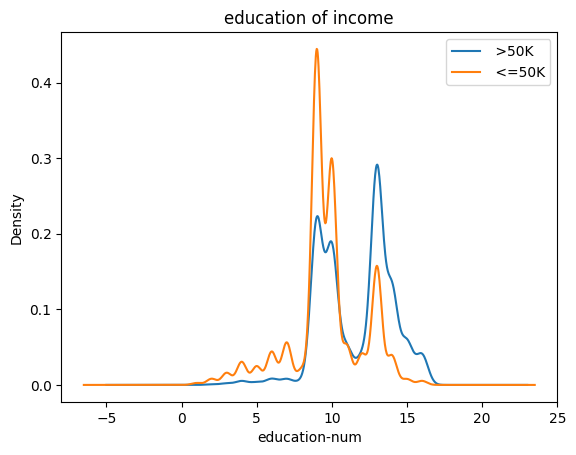

In [15]:
income_0 = df["education-num"][df["income"] == 0]
income_1 = df["education-num"][df["income"] == 1]
df1 = pd.DataFrame({' >50K' : income_1, ' <=50K' : income_0})
df1.plot(kind = 'kde')


plt.title("education of income")
plt.xlabel("education-num")


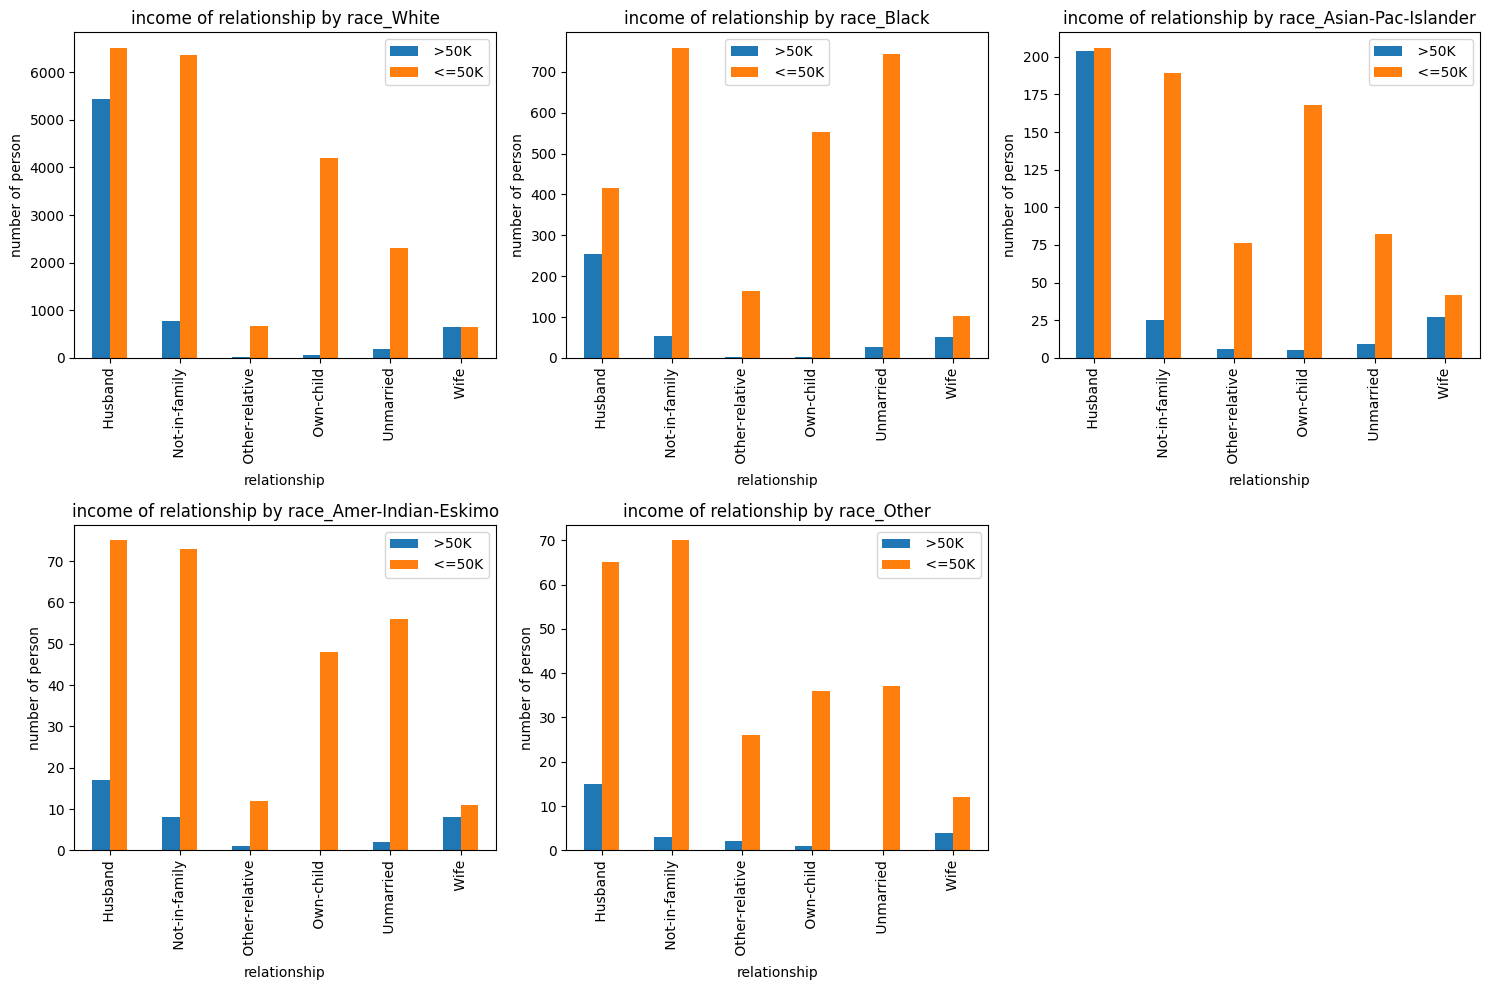

In [16]:
fig = plt.figure(figsize = (15, 10))

ax1 = fig.add_subplot(231) 
income_0 = df[df["race"] == ' White']["relationship"][df["income"] == 0].value_counts()
income_1 = df[df["race"] == ' White']["relationship"][df["income"] == 1].value_counts()
df1 = pd.DataFrame({' >50K' : income_1, ' <=50K' : income_0})
df1.plot(kind = 'bar', ax = ax1)
ax1.set_ylabel('number of person')
ax1.set_title('income of relationship by race_White')

ax2 = fig.add_subplot(232) 
income_0 = df[df["race"] == ' Black']["relationship"][df["income"] == 0].value_counts()
income_1 = df[df["race"] == ' Black']["relationship"][df["income"] == 1].value_counts()
df2 = pd.DataFrame({' >50K' : income_1, ' <=50K' : income_0})
df2.plot(kind = 'bar', ax = ax2)
ax2.set_ylabel('number of person')
ax2.set_title('income of relationship by race_Black')

ax3 = fig.add_subplot(233) 
income_0 = df[df["race"] == ' Asian-Pac-Islander']["relationship"][df["income"] == 0].value_counts()
income_1 = df[df["race"] == ' Asian-Pac-Islander']["relationship"][df["income"] == 1].value_counts()
df3 = pd.DataFrame({' >50K' : income_1, ' <=50K' : income_0})
df3.plot(kind = 'bar', ax = ax3)
ax3.set_ylabel('number of person')
ax3.set_title('income of relationship by race_Asian-Pac-Islander')

ax4 = fig.add_subplot(234) 
income_0 = df[df["race"] == ' Amer-Indian-Eskimo']["relationship"][df["income"] == 0].value_counts()
income_1 = df[df["race"] == ' Amer-Indian-Eskimo']["relationship"][df["income"] == 1].value_counts()
df4 = pd.DataFrame({' >50K' : income_1, ' <=50K' : income_0})
df4.plot(kind = 'bar', ax = ax4)
ax4.set_ylabel('number of person')
ax4.set_title('income of relationship by race_Amer-Indian-Eskimo')

ax5 = fig.add_subplot(235) 
income_0 = df[df["race"] == ' Other']["relationship"][df["income"] == 0].value_counts()
income_1 = df[df["race"] == ' Other']["relationship"][df["income"] == 1].value_counts()
df5 = pd.DataFrame({' >50K' : income_1, ' <=50K' : income_0})
df5.plot(kind = 'bar', ax = ax5)
ax5.set_ylabel('number of person')
ax5.set_title('income of relationship by race_Other')

plt.tight_layout()

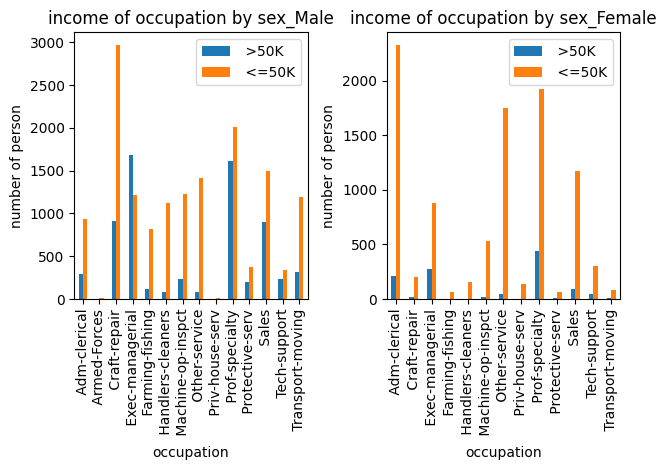

In [17]:
fig = plt.figure()

ax1 = fig.add_subplot(121) 
income_0 = df[df["sex"] == ' Male']["occupation"][df["income"] == 0].value_counts()
income_1 = df[df["sex"] == ' Male']["occupation"][df["income"] == 1].value_counts()
df1 = pd.DataFrame({' >50K' : income_1, ' <=50K' : income_0})
df1.plot(kind = 'bar', ax = ax1)
ax1.set_ylabel('number of person')
ax1.set_title('income of occupation by sex_Male')

ax2 = fig.add_subplot(122) 
income_0 = df[df["sex"] == ' Female']["occupation"][df["income"] == 0].value_counts()
income_1 = df[df["sex"] == ' Female']["occupation"][df["income"] == 1].value_counts()
df2 = pd.DataFrame({' >50K' : income_1, ' <=50K' : income_0})
df2.plot(kind = 'bar', ax = ax2)
ax2.set_ylabel('number of person')
ax2.set_title('income of occupation by sex_Female')

plt.tight_layout()

In [18]:
df_object_col = [col for col in df.columns if df[col].dtype.name == 'object']
df_int_col = [col for col in df.columns if df[col].dtype.name != 'object' and col != 'income']
target = df["income"]
dataset = pd.concat([df[df_int_col], pd.get_dummies(df[df_object_col])], axis = 1)
dataset.head()

,age,education-num,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,13,40,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
1,50,13,13,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
2,38,9,40,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,53,7,40,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,28,13,40,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# ML

In [12]:
import pandas as pd 
import numpy as np
import os 
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import csv
from torch.utils.tensorboard import SummaryWriter
from torch.utils.data import Dataset, DataLoader


数据预处理，要注意的是训练集和测试集进行独热编码之后可能形状不一样，所以要将他们"进行配对"；再者是因为我们要给缺失某列的数据进行增加全为零的列，奇怪的是当从DataFrame类型转到Numpy类型时全为零的列会全部变成nan，所以还要重新nan的列转成零。否则在预测的过程网络的输出会全部为nan。本次实验将训练集进行2 : 8的数据划分，2份作为验证集。且要对数据集进行"归一化"，效果会好很多

In [13]:
def add_missing_columns(d, columns):
    missing_col = set(columns) - set(d.columns)
    for col in missing_col:
        d[col] = 0


def fix_columns(d, columns):
    add_missing_columns(d, columns)
    assert set(columns) - set(d.columns) == set()
    d = d[columns]
    return d


def data_process(df, model):
    # replace ? with na
    df.replace(" ?", pd.NaT, inplace=True)
    if model == "train":
        df.replace(" >50K", 1, inplace=True)
        df.replace(" <=50K", 0, inplace=True)
    if model == "test":
        df.replace(" >50K.", 1, inplace=True)
        df.replace(" <=50K.", 0, inplace=True)

    trans = {
        "workclass": df["workclass"].mode()[0],
        "occupation": df["occupation"].mode()[0],
        "native-country": df["native-country"].mode()[0],
    }
    # fill na
    df.fillna(trans, inplace=True)

    # drop features
    df.drop("fnlwgt", axis=1, inplace=True)
    df.drop("capital-gain", axis=1, inplace=True)
    df.drop("capital-loss", axis=1, inplace=True)

    df_object_col = [col for col in df.columns if df[col].dtype.name == "object"]
    df_int_col = [
        col for col in df.columns if df[col].dtype.name != "object" and col != "income"
    ]
    target = df["income"]
    dataset = pd.concat([df[df_int_col], pd.get_dummies(df[df_object_col])], axis=1)

    return target, dataset


class Adult_data(Dataset):
    def __init__(self, model):
        super(Adult_data, self).__init__()
        self.model = model

        df_train = pd.read_csv(
            "./adult/adult.data",
            header=None,
            names=[
                "age",
                "workclass",
                "fnlwgt",
                "education",
                "education-num",
                "marital-status",
                "occupation",
                "relationship",
                "race",
                "sex",
                "capital-gain",
                "capital-loss",
                "hours-per-week",
                "native-country",
                "income",
            ],
        )
        df_test = pd.read_csv(
            "./adult/adult.test",
            header=None,
            skiprows=1,
            names=[
                "age",
                "workclass",
                "fnlwgt",
                "education",
                "education-num",
                "marital-status",
                "occupation",
                "relationship",
                "race",
                "sex",
                "capital-gain",
                "capital-loss",
                "hours-per-week",
                "native-country",
                "income",
            ],
        )

        train_target, train_dataset = data_process(df_train, "train")
        test_target, test_dataset = data_process(df_test, "test")

        # 要注意的是训练集和测试集进行独热编码之后可能形状不一样，所以要将他们进行配对；
        # 再者是因为我们要给缺失某列的数据进行增加全为零的列
        # 进行独热编码对齐
        test_dataset = fix_columns(test_dataset, train_dataset.columns)
        train_dataset = train_dataset.apply(lambda x: (x - x.mean()) / x.std())
        test_dataset = test_dataset.apply(lambda x: (x - x.mean()) / x.std())

        train_target, test_target = np.array(train_target), np.array(test_target)
        train_dataset, test_dataset = np.array(
            train_dataset, dtype=np.float32
        ), np.array(test_dataset, dtype=np.float32)
        if model == "test":
            isnan = np.isnan(test_dataset)
            test_dataset[np.where(isnan)] = 0.0


        if model == "test":
            self.target = torch.tensor(test_target, dtype=torch.int64)
            self.dataset = torch.FloatTensor(test_dataset)
        else:
            # train: 80%
            # validate: 20%
            # 前百分之八十的数据作为训练集，其余作为验证集
            if model == "train":
                self.target = torch.tensor(train_target, dtype=torch.int64)[
                    : int(len(train_dataset) * 0.8)
                ]
                self.dataset = torch.FloatTensor(train_dataset)[
                    : int(len(train_target) * 0.8)
                ]
            else:
                self.target = torch.tensor(train_target, dtype=torch.int64)[
                    int(len(train_target) * 0.8) :
                ]
                self.dataset = torch.FloatTensor(train_dataset)[
                    int(len(train_dataset) * 0.8) :
                ]
        print(self.dataset.shape, self.target.dtype)

    def __getitem__(self, item):
        return self.dataset[item], self.target[item]

    def __len__(self):
        return len(self.dataset)


train_dataset = Adult_data(model="train")
val_dataset = Adult_data(model="val")
test_dataset = Adult_data(model="test")

train_loader = DataLoader(
  train_dataset,
  batch_size=64,
  shuffle=True,
  drop_last=False
)
val_loader = DataLoader(
  val_dataset,
  batch_size=64,
  shuffle=False,
  drop_last=False
)
test_loader = DataLoader(
  test_dataset,
  batch_size=64,
  shuffle=False,
  drop_last=False
)

torch.Size([26048, 102]) torch.int64
torch.Size([6513, 102]) torch.int64
torch.Size([16281, 102]) torch.int64


构建网络，因为是简单的二分类，这里使用了两层感知机网络，后面做对结果进行softmax归一化

In [15]:
class Adult_Model(nn.Module):
    def __init__(self):
        super(Adult_Model, self).__init__()

        # 102 -> 这应该与预处理后的数据集特征数量相匹配
        self.net = nn.Sequential(
            nn.Linear(102, 64),
            nn.ReLU(),
            # nn.Dropout(0.5),  # Dropout层，防止过拟合
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 2),  # 二分类问题，输出2个类
        )

    def forward(self, x):
        out = self.net(x)
        return F.softmax(out)

训练及验证，每经过一个epoch，就进行一次损失比较，当val_loss更小时，保存最好模型，直至迭代结束。

In [16]:
if torch.cuda.is_available():
    use_device = "cuda"
elif torch.backends.mps.is_available():
    use_device = "mps"
else:
    use_device = "cpu"

device = torch.device(use_device)
model = Adult_Model().to(device)


optimizer = optim.SGD(model.parameters(), lr = 0.001, momentum = 0.9)
criterion = nn.CrossEntropyLoss()

# optimizer = optim.Adam(model.parameters(), lr=0.001)  # 使用Adam优化器
# criterion = nn.CrossEntropyLoss()


max_epoch = 30
classes = [' <=50K', ' >50K']
mse_loss = 1000000
os.makedirs('MyModels', exist_ok = True)
writer = SummaryWriter(log_dir = 'logs')


for epoch in range(max_epoch) :
    
    train_loss = 0.0
    train_acc = 0.0
    model.train()
    for x, label in train_loader :
        x, label = x.to(device), label.to(device)
        optimizer.zero_grad()
        
        out = model(x)
        loss = criterion(out, label)
        train_loss += loss.item()
        loss.backward()
        
        _, pred = torch.max(out, 1)
#         print(pred)
        num_correct = (pred == label).sum().item()
        acc = num_correct / x.shape[0]
        train_acc += acc
        optimizer.step()
        
    print(f'epoch : {epoch + 1}, train_loss : {train_loss / len(train_loader.dataset)}, train_acc : {train_acc / len(train_loader)}')
    writer.add_scalar('train_loss', train_loss / len(train_loader.dataset), epoch)
    
    with torch.no_grad() :
        total_loss = []
        model.eval()
        for x, label in val_loader :
            x, label = x.to(device), label.to(device)
            out = model(x)
            loss = criterion(out, label)
            total_loss.append(loss.item())
        
        val_loss = sum(total_loss) / len(total_loss)
    
    if val_loss < mse_loss :
        mse_loss = val_loss 
        torch.save(model.state_dict(), 'MyModels/Deeplearning_Model.pth')

del model
writer.close()

/var/folders/qn/q_wdcf6x4kx5w2f12hyjr3700000gn/T/ipykernel_55615/400813551.py:17: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(out)


epoch : 1, train_loss : 0.009691545737481674, train_acc : 0.7326474201474201
epoch : 2, train_loss : 0.008634004167553394, train_acc : 0.7604038697788698
epoch : 3, train_loss : 0.008350071267291207, train_acc : 0.7604038697788698
epoch : 4, train_loss : 0.00815826512333143, train_acc : 0.7604038697788698
epoch : 5, train_loss : 0.007978407468152501, train_acc : 0.7622850122850123
epoch : 6, train_loss : 0.0077991070573650645, train_acc : 0.8025184275184275
epoch : 7, train_loss : 0.007638891141733535, train_acc : 0.8254760442260443
epoch : 8, train_loss : 0.007525302913653177, train_acc : 0.8287776412776413
epoch : 9, train_loss : 0.007453030335696309, train_acc : 0.8311194717444718
epoch : 10, train_loss : 0.00740603682143426, train_acc : 0.8326167076167076
epoch : 11, train_loss : 0.007373549865618239, train_acc : 0.8333845208845209
epoch : 12, train_loss : 0.007350627385555819, train_acc : 0.8349201474201474
epoch : 13, train_loss : 0.007332768975425265, train_acc : 0.8363022113022

In [17]:
best_model = Adult_Model().to(device)
ckpt = torch.load('MyModels/Deeplearning_Model.pth', map_location='cpu')
best_model.load_state_dict(ckpt)

test_loss = 0.0
test_acc = 0.0
best_model.eval()
result = []

for x, label in test_loader :
    x, label = x.to(device), label.to(device)
    
    out = best_model(x)
    loss = criterion(out, label)
    test_loss += loss.item()
    _, pred = torch.max(out, dim = 1)
    result.append(pred.detach())
    num_correct = (pred == label).sum().item()
    acc = num_correct / x.shape[0]
    test_acc += acc

print(f'test_loss : {test_loss / len(test_loader.dataset)}, test_acc : {test_acc / len(test_loader)}')

result = torch.cat(result, dim = 0).cpu().numpy()
with open("Predict/Deeplearing.csv", "w", newline="") as file:
    writer = csv.writer(file)
    writer.writerow(['id', 'pred_result'])
    for i, pred in enumerate(result) :
        writer.writerow([i, classes[pred]])

/var/folders/qn/q_wdcf6x4kx5w2f12hyjr3700000gn/T/ipykernel_55615/400813551.py:17: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(out)


test_loss : 0.0073199739243692665, test_acc : 0.8352867647058823


正确率达到0.8360833333333333

In [22]:
import shap


model = Adult_Model()
model.load_state_dict(torch.load("MyModels/Deeplearning_Model.pth"))
model.eval()


def dataset_to_numpy(dataset):
    inputs = []
    targets = []
    for x, y in dataset:
        inputs.append(x.numpy())
        targets.append(y.numpy())
    return np.array(inputs), np.array(targets)


train_inputs, train_targets = dataset_to_numpy(train_loader.dataset)

# 使用SHAP解释模型
explainer = shap.DeepExplainer(
    model,
    torch.tensor(train_inputs, dtype=torch.float32)
)
shap_values = explainer.shap_values(
    torch.tensor(train_inputs, dtype=torch.float32)
)
shap.summary_plot(
    shap_values, 
    train_inputs, 
    feature_names=train_loader.dataset.dataset.columns
)

/var/folders/qn/q_wdcf6x4kx5w2f12hyjr3700000gn/T/ipykernel_55615/400813551.py:17: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(out)
